In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Normalize using TRAIN data only
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test  = (X_test  - mean) / std

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost_function(X, y, m, b):
    n = len(X)
    cost = 0.0

    for i in range(n):
        z = np.dot(m, X[i]) + b
        g = sigmoid(z)

        cost += -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)

    return cost * (1 / n)

In [ ]:
def gradient_func(X, y, m, b):
    n = len(X)
    grad_m = np.zeros(len(X[0]))
    grad_b = 0.0

    for i in range(n):
        z = np.dot(m, X[i]) + b
        g = sigmoid(z)

        grad_b += (g - y[i])
        grad_m += (g - y[i]) * X[i]

    grad_m /= n
    grad_b /= n

    return grad_m, grad_b

In [ ]:
def gradient_desc(rate, iters, X, y):
    m = np.zeros(X.shape[1])
    b = 0.0
    costs = []

    for _ in range(iters):
        gm, gb = gradient_func(X, y, m, b)
        m -= rate * gm
        b -= rate * gb
        costs.append(cost_function(X, y, m, b))

    return m, b, costs

In [ ]:
def predict(X, m, b):
    probs = sigmoid(np.dot(X, m) + b)
    return (probs >= 0.5).astype(int)

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Train
m, b, costs = gradient_desc(0.05, 6000, X_train, y_train)

# Evaluate
y_pred = predict(X_test, m, b)
print("Accuracy:", 
    accuracy(y_test, y_pred))

Accuracy: 0.8888888888888888


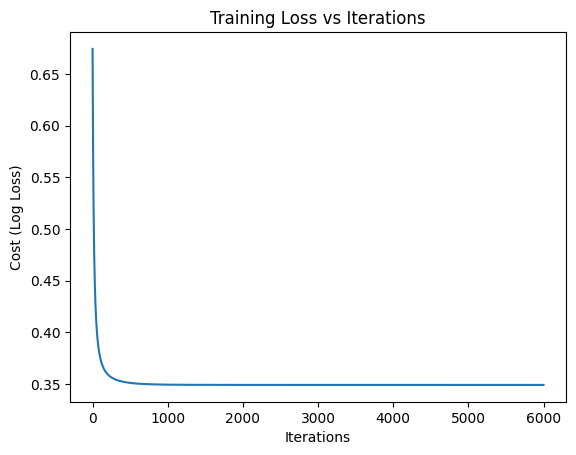

In [ ]:
plt.figure()
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost (Log Loss)")
plt.title("Training Loss vs Iterations")
plt.show()

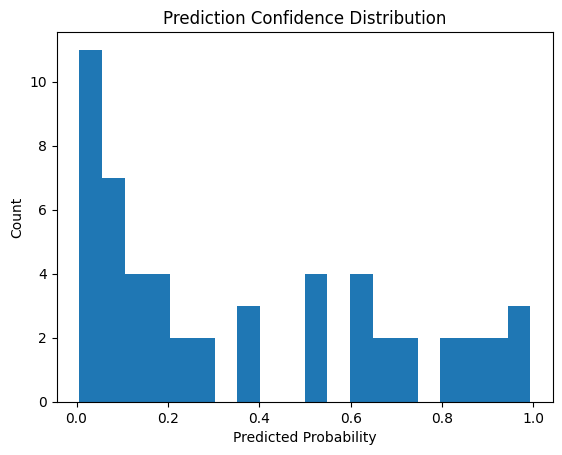

In [ ]:
probs = sigmoid(np.dot(X_test, m) + b)

plt.figure()
plt.hist(probs, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Prediction Confidence Distribution")
plt.show()

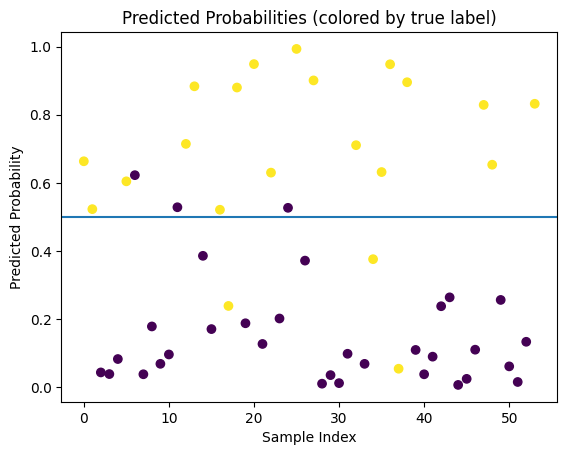

In [ ]:
plt.figure()
plt.scatter(range(len(probs)), probs, c=y_test)
plt.axhline(0.5)
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probabilities (colored by true label)")
plt.show()

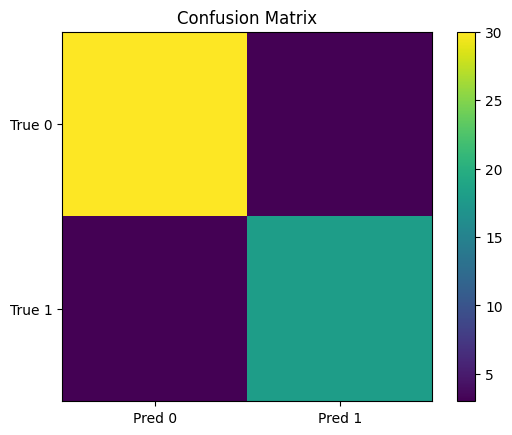

In [ ]:
y_pred = (probs >= 0.5).astype(int)

TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                         [FN, TP]])

plt.figure()
plt.imshow(conf_matrix)
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.show()


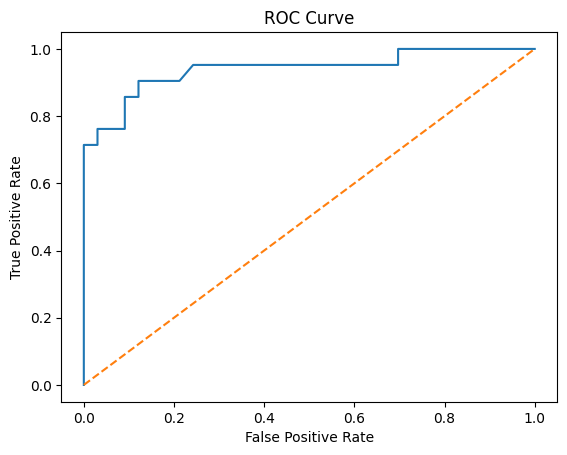

In [ ]:
thresholds = np.linspace(0, 1, 100)
tpr = []
fpr = []

for t in thresholds:
    y_temp = (probs >= t).astype(int)
    TP = np.sum((y_test == 1) & (y_temp == 1))
    TN = np.sum((y_test == 0) & (y_temp == 0))
    FP = np.sum((y_test == 0) & (y_temp == 1))
    FN = np.sum((y_test == 1) & (y_temp == 0))

    tpr.append(TP / (TP + FN))
    fpr.append(FP / (FP + TN))

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()